In [10]:
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph.message import add_messages

messages = [AIMessage(f"So you said you were researching fictional creatures?", name="Bot")]
messages = add_messages(messages, HumanMessage(f"Yes, I was wondering if there were mythical beings other than dragons.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching fictional creatures?
================================ Human Message =================================
Name: Lance

Yes, I was wondering if there were mythical beings other than dragons.


In [11]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke(messages)

AIMessage(content='Absolutely! There are numerous mythical beings from various cultures around the world. Here are a few examples:\n\n1. **Phoenix**: A mythical bird that is said to burst into flames upon death and be reborn from its ashes, symbolizing renewal and immortality. It appears in various cultures, including Greek, Egyptian, and Chinese mythology.\n\n2. **Unicorn**: A legendary creature often depicted as a horse with a single, spiraling horn protruding from its forehead. It is commonly associated with purity and grace and appears in European folklore.\n\n3. **Griffin**: A creature with the body of a lion and the head and wings of an eagle. Griffins are known for guarding treasures and valuables in various mythologies, particularly Greek.\n\n4. **Kraken**: A legendary sea monster of enormous size said to dwell off the coasts of Norway and Greenland. It often appears as a giant octopus or squid capable of dragging entire ships under the sea.\n\n5. **Chimera**: In Greek mytholog

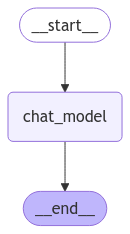

In [12]:
from IPython.display import Image, display
from langgraph.graph import MessagesState, StateGraph, START, END

def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching fictional creatures?
================================ Human Message =================================
Name: Lance

Yes, I was wondering if there were mythical beings other than dragons.
================================== Ai Message ==================================

Absolutely, there are many mythical beings from various cultures around the world, each with their own unique characteristics and stories. Here are a few examples:

1. **Phoenix**: A mythical bird from Greek mythology that is cyclically regenerated or reborn. Associated with the sun, it obtains new life by arising from the ashes of its predecessor.

2. **Unicorn**: A legendary creature that has been described since antiquity as a beast with a single large, pointed, spiraling horn projecting from its forehead. Often depicted as a symbol of purity and grace in Western mythology.

3. **Griffin**: A crea

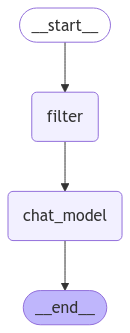

In [14]:
from langchain_core.messages import RemoveMessage

def filter_messages(state: MessagesState):
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage(f"So you said you were researching fictional creatures?", name="Bot", id="3"))
messages.append(HumanMessage(f"Yes, I was wondering if there were mythical beings other than dragons.", name="Lance", id="4"))

In [17]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching fictional creatures?
================================ Human Message =================================
Name: Lance

Yes, I was wondering if there were mythical beings other than dragons.
================================== Ai Message ==================================

Certainly! There are numerous mythical creatures from cultures around the world, each with its own unique characteristics and stories. Here are a few notable ones:

1. **Unicorn** - A legendary horse-like creature with a single spiraling horn on its forehead, often associated with purity and grace.

2. **Phoenix** - A mythical bird that regenerates or is reborn from its ashes after dying, symbolizing renewal and immortality.

3. **Kraken** - A giant sea monster from Scandinavian folklore, said to dwell off the coasts of Norway and Greenland, often depicted as a massive octopus or squid.

4. **Griffin

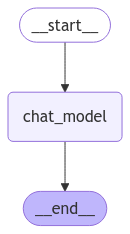

In [20]:
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Krakens", name="Lance"))

output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================

Krakens are legendary sea monsters of enormous size that are said to dwell off the coasts of Norway and Greenland. They are often depicted as gigantic octopus or squid-like creatures and have been a part of maritime folklore for centuries. The myth of the Kraken likely originated from sightings of real-life giant squids, which can grow to impressive lengths and are capable of powerful displays in the water.

### Historical Accounts and Folklore:
1. **Scandinavian Origins**: The Kraken is deeply rooted in Norse mythology and Scandinavian folklore. It was first mentioned in a travelogue by Francesco Negri in 1700. The earliest description resembling the Kraken appears in the travelogue of Francesco Negri from 1700.

2. **Erik Pontoppidan**: In the 18th century, Bishop Erik Pontoppidan of Bergen provided one of the earliest detailed descriptions of the Kraken in his work "The Natural History of Norway" (1752

In [28]:
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching fictional creatures?
================================ Human Message =================================
Name: Lance

Yes, I was wondering if there were mythical beings other than dragons.
================================== Ai Message ==================================

Certainly! There are numerous mythical creatures from cultures around the world, each with its own unique characteristics and stories. Here are a few notable ones:

1. **Unicorn** - A legendary horse-like creature with a single spiraling horn on its forehead, often associated with purity and grace.

2. **Phoenix** - A mythical bird that regenerates or is reborn from its ashes after dying, symbolizing renewal a

# Trim Messages

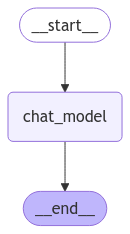

In [31]:
from langchain_core.messages import trim_messages

def chat_model_node(state: MessagesState):
    messages = trim_messages(
        state["messages"],
        max_tokens=100,
        strategy="last",
        token_counter=ChatOpenAI(model="gpt-4o"),
        allow_partial=False,
    )
    return {"messages": [llm.invoke(messages)]}

builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [38]:
messages.append(output["messages"][-1])
messages.append(HumanMessage(f"Tell me more about mythical sea creatures", name="Lance"))

In [39]:
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False
        )

[HumanMessage(content='Tell me more about mythical sea creatures', additional_kwargs={}, response_metadata={}, name='Lance')]

In [40]:
messages_out_trim = graph.invoke({'messages': messages})


In [41]:
for m in messages_out_trim['messages']:
    m.pretty_print()

================================== Ai Message ==================================

Krakens are legendary sea monsters of enormous size that are said to dwell off the coasts of Norway and Greenland. They are often depicted as gigantic octopus or squid-like creatures and have been a part of maritime folklore for centuries. The myth of the Kraken likely originated from sightings of real-life giant squids, which can grow to impressive lengths and are capable of powerful displays in the water.

### Historical Accounts and Folklore:
1. **Scandinavian Origins**: The Kraken is deeply rooted in Norse mythology and Scandinavian folklore. It was first mentioned in a travelogue by Francesco Negri in 1700. The earliest description resembling the Kraken appears in the travelogue of Francesco Negri from 1700.

2. **Erik Pontoppidan**: In the 18th century, Bishop Erik Pontoppidan of Bergen provided one of the earliest detailed descriptions of the Kraken in his work "The Natural History of Norway" (1752